In [1]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
from pandas import DataFrame
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.neighbors import KNeighborsClassifier

In [3]:
df = pd.read_csv('dataset.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [7]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'cp'}>,
        <AxesSubplot:title={'center':'trestbps'}>],
       [<AxesSubplot:title={'center':'chol'}>,
        <AxesSubplot:title={'center':'fbs'}>,
        <AxesSubplot:title={'center':'restecg'}>,
        <AxesSubplot:title={'center':'thalach'}>],
       [<AxesSubplot:title={'center':'exang'}>,
        <AxesSubplot:title={'center':'oldpeak'}>,
        <AxesSubplot:title={'center':'slope'}>,
        <AxesSubplot:title={'center':'ca'}>],
       [<AxesSubplot:title={'center':'thal'}>,
        <AxesSubplot:title={'center':'target'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

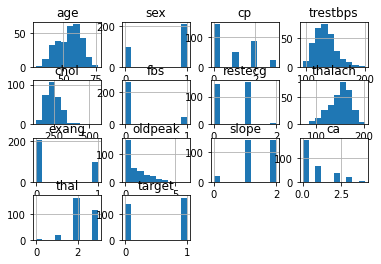

In [9]:
df.hist()

<AxesSubplot:xlabel='target', ylabel='count'>

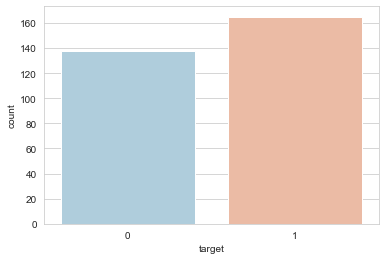

In [10]:
sns.set_style('whitegrid')
sns.countplot(x='target',data=df,palette='RdBu_r')

In [4]:
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
df[columns_to_scale] = standardScaler.fit_transform(df[columns_to_scale])
dataset = df
dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.952197,1,3,0.763956,-0.256334,1,0,0.015443,0,1.087338,0,0,1,1
1,-1.915313,1,2,-0.092738,0.072199,0,1,1.633471,0,2.122573,0,0,2,1
2,-1.474158,0,1,-0.092738,-0.816773,0,0,0.977514,0,0.310912,2,0,2,1
3,0.180175,1,1,-0.663867,-0.198357,0,1,1.239897,0,-0.206705,2,0,2,1
4,0.290464,0,0,-0.663867,2.082050,0,1,0.583939,1,-0.379244,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.290464,0,0,0.478391,-0.101730,0,1,-1.165281,1,-0.724323,1,0,3,0
299,-1.033002,1,3,-1.234996,0.342756,0,1,-0.771706,0,0.138373,1,0,3,0
300,1.503641,1,0,0.706843,-1.029353,1,1,-0.378132,0,2.036303,1,2,3,0
301,0.290464,1,0,-0.092738,-2.227533,0,1,-1.515125,1,0.138373,1,1,3,0


In [5]:
from sklearn.model_selection import train_test_split

predictors = dataset.drop("target",axis=1)
target = dataset["target"]

# splitting main dataset to train and test
X_train,X_test,Y_train,Y_test = train_test_split(predictors, target, test_size=0.20, random_state=0)

# ratio  80 : 20
#     train : test

In [6]:
X_train.shape
print(X_train.columns)

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')


In [24]:
X_test.shape

(61, 13)

In [25]:
Y_train.shape

(242,)

In [26]:
Y_test.shape

(61,)

In [7]:
#  for model fitting
from sklearn.metrics import accuracy_score

In [8]:
from sklearn.model_selection import cross_val_score
knn_scores = []
score = 0
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    score=cross_val_score(knn_classifier,X_train,Y_train,cv=10)
    knn_scores.append(score.mean())

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

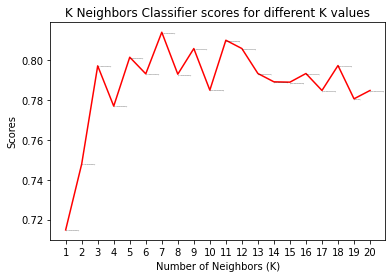

In [9]:
plt.plot([k for k in range(1, 21)], knn_scores, color = 'red')
for i in range(1,21):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]), size = 1)
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

In [10]:
knn_classifier = KNeighborsClassifier(n_neighbors = 7)
score=cross_val_score(knn_classifier,X_train,Y_train,cv=10)

In [11]:
score.mean()

0.8138333333333334

In [12]:
knn_classifier.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=7)

In [13]:
Y_pred_knn=knn_classifier.predict(X_test)
Y_pred_knn.shape

(61,)

In [14]:
score_knn = round(accuracy_score(Y_pred_knn,Y_test)*100,2)
print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

The accuracy score achieved using KNN is: 85.25 %


In [38]:
# save the model to disk
filename = 'finalized_model1.sav'
pickle.dump(knn_classifier, open(filename, 'wb'))
score.mean()

0.8138333333333334

In [39]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_train, Y_train)
print(result)

0.8429752066115702


In [43]:
print(X_test.columns)

X_new = np.array([63,1,3,145,233,1,0,150,0,2.3,0,0,1])

# X_new = DataFrame(X_new)

preds = loaded_model.predict(X_new.reshape(1, -1))
print(preds)

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')
[1]


In [45]:
preds = loaded_model.predict(X_test)
print(preds)


[0 1 1 0 0 1 0 0 0 0 1 1 0 1 1 1 0 1 0 1 1 0 0 0 1 1 0 0 1 1 1 0 1 1 1 0 0
 1 0 0 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1]


In [15]:
sklearn.confusion_matrix(X_test, Y_test)

NameError: name 'confusion_matrix' is not defined

In [16]:
from sklearn.metrics import confusion_matrix

# After a train/test split:
confusion_matrix(Y_test, Y_pred_knn)

array([[21,  6],
       [ 3, 31]], dtype=int64)